## Draw elemental descriptors heatmap

This code snippet show how to draw a elemental descriptor heatmap.
Descriptors with box-cox power transfer

<class 'pandas.core.frame.DataFrame'>
Index: 23776 entries, CaCrP2O7 to H5BrO2
Columns: 290 entries, ave:atomic_number to min:Polarizability
dtypes: float64(290)
memory usage: 52.8+ MB
None


/usr/local/anaconda3/envs/xenonpy/lib/python3.5/site-packages/scipy/stats/morestats.py:901: RuntimeWarning: divide by zero encountered in log
  llf -= N / 2.0 * np.log(np.sum((y - y_mean)**2. / N, axis=0))
/usr/local/anaconda3/envs/xenonpy/lib/python3.5/site-packages/scipy/optimize/optimize.py:1926: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)
/usr/local/anaconda3/envs/xenonpy/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/usr/local/anaconda3/envs/xenonpy/lib/python3.5/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/usr/local/anaconda3/envs/xenonpy/lib/python3.5/site-packages/scipy/optimize/optimize.py:1929: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = 2.0 * (tmp2 - tmp1)
/usr/local/anaconda3/envs/xenonpy/lib/python3.5/s

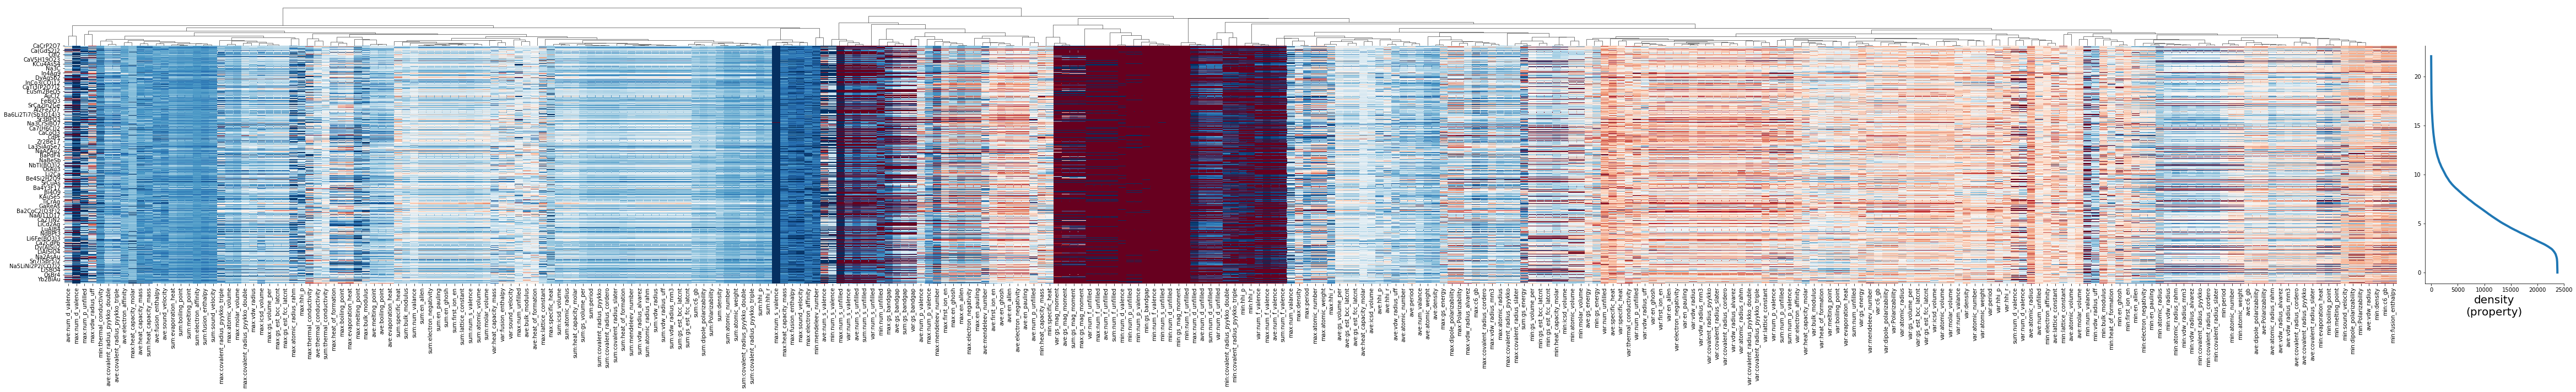

In [1]:
%matplotlib inline

from xenonpy.utils.datatools import Loader
from xenonpy.visualization import DescHeatmap

loader = Loader()
inorganic = loader('mp_inorganic')
desc = loader('element_desc').last()

ingic = inorganic[inorganic.e_above_hull == 0]

dens = ingic.reset_index(drop=True)
dens = dens[dens['density'] != 0]
dens = dens.sort_values(by='density', ascending=False)
desc_dens = desc.iloc[dens.index, :]

print(desc_dens.info())



dh_map = DescHeatmap(
    save=dict(fname='density_desc.png', dpi=150, bbox_inches='tight', transparent=False),
    method='complete',
    bc=True,  # box-cox transfer
    figsize=(70, 10))

dh_map.fit(desc_dens)
dh_map.draw(dens['density'])

## Draw pair distribution function (PDF) descriptors heatmap

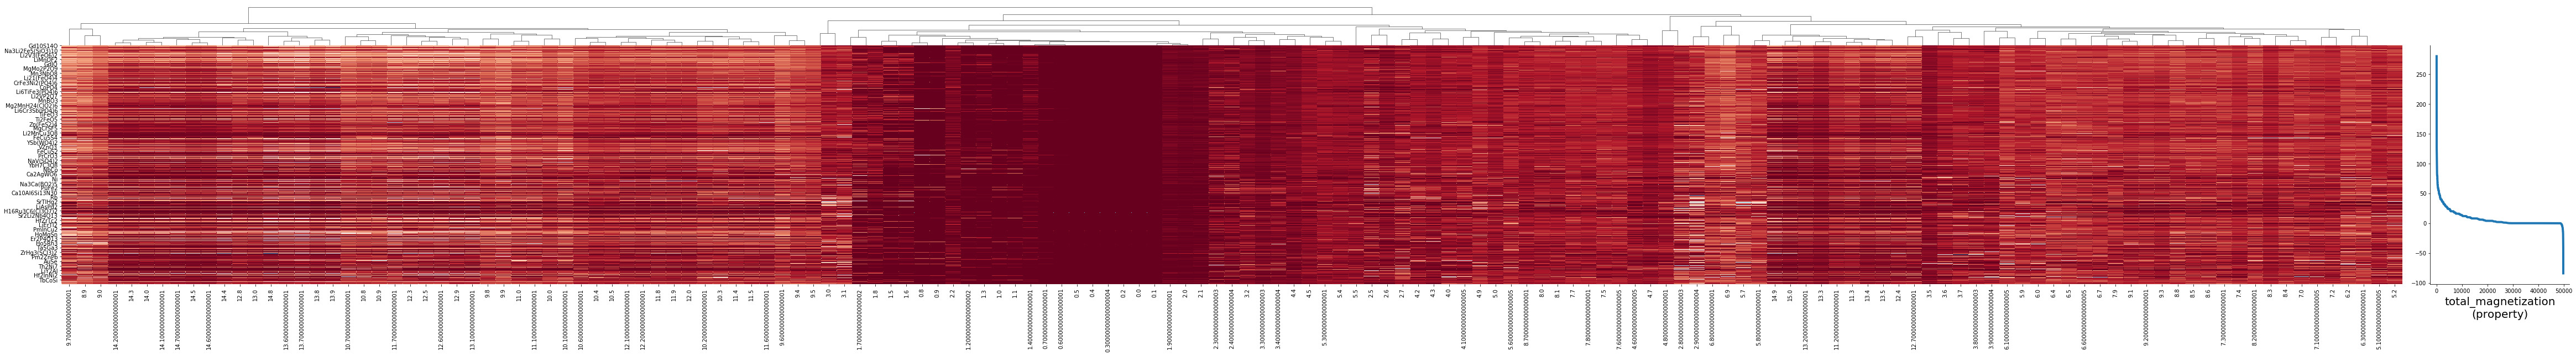

In [4]:
%matplotlib inline

from xenonpy.utils.datatools import Loader
from xenonpy.visualization import DescHeatmap

prop = 'total_magnetization'

loader = Loader()
inorganic = loader('mp_inorganic')
desc = loader('pdf_desc').last()

# ingic = inorganic[inorganic.e_above_hull == 0]

dens = inorganic.reset_index(drop=True)
dens = dens[dens[prop] != 0]
dens = dens.sort_values(by=prop, ascending=False)
desc_dens = desc.iloc[dens.index, :]


dh_map = DescHeatmap(
    save=dict(fname=prop + '_desc.png', dpi=150, bbox_inches='tight', transparent=False),
    method='complete',
    bc=False,
    figsize=(70, 10))

dh_map.fit(desc_dens)
dh_map.draw(dens[prop])